In [1]:
pip install tbparse

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [126]:
from tbparse import SummaryReader
import matplotlib.pyplot as plt

def plot_loss(tblog_dir, save_path, ylim=None, show=False):
    '''
    Display a plot by retreaving logs from a Tensorboard dir.

    Parameters:
        tblog_dir (float): the path to the Tensorboard log folder
        save_path (float): the path of the file to save (.jpg)
        ylim (list): a list of minimum and maximum values for the y axis (2 values)
        show (bool): should be True to display the plot (in notebook). Keep it False for scripting.

    '''
    
    [0,25.0]
    
    
    reader = SummaryReader(log_dir)  # Read the logs from Tensorboard dir
    df = reader.scalars  # Read the scalar
    # Get train loss
    train_loss = df[df["tag"] == 'train_loss']
    train_loss.set_index('step', inplace=True)
    # Get val loss
    val_loss = df[df["tag"] == 'val_loss']
    val_loss.set_index('step', inplace=True)
    # Plot loss curves
    plt.plot(train_loss.loc[:, 'value'])
    plt.plot(val_loss.loc[:, 'value'])
    plt.title("Loss curves")
    plt.legend(['train', 'val'], loc='upper right')
    plt.ylabel("loss")
    plt.xlabel("step")
    if not ylim:
        max_loss = max(train_loss.max()['value'],val_loss.max()['value'])
        ylim = [0,round(max_loss, 2)+0.1]
    plt.ylim(ylim)
    plt.savefig(save_path, dpi = 200)
    if show:
        plt.show()
    else: 
        plt.close()

In [126]:
from tbparse import SummaryReader
import matplotlib.pyplot as plt

def plot_miou(tblog_dir, save_path, ylim=None, show=False):
    '''
    Display a plot by retreaving logs from a Tensorboard dir.

    Parameters:
        tblog_dir (float): the path to the Tensorboard log folder
        save_path (float): the path of the file to save (.jpg)
        ylim (list): a list of minimum and maximum values for the y axis (2 values)
        show (bool): should be True to display the plot (in notebook). Keep it False for scripting.

    ''' 
    reader = SummaryReader(log_dir)  # Read the logs from Tensorboard dir
    df = reader.scalars  # Read the scalar
    # Get train loss
    train_loss = df[df["tag"] == 'train_loss']
    train_loss.set_index('step', inplace=True)
    # Get val loss
    val_loss = df[df["tag"] == 'val_loss']
    val_loss.set_index('step', inplace=True)
    # Plot loss curves
    plt.plot(train_loss.loc[:, 'value'])
    plt.plot(val_loss.loc[:, 'value'])
    plt.title("Loss curves")
    plt.legend(['train', 'val'], loc='upper right')
    plt.ylabel("loss")
    plt.xlabel("step")
    if not ylim:
        max_loss = max(train_loss.max()['value'],val_loss.max()['value'])
        ylim = [0,round(max_loss, 2)+0.1]
    plt.ylim(ylim)
    plt.savefig(save_path, dpi = 200)
    if show:
        plt.show()
    else: 
        plt.close()

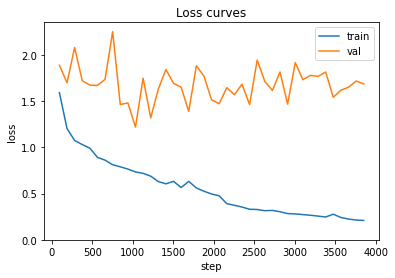

In [127]:
tblog_dir = "/home/tgrippa/project/weak_flair/experiments/flair-one-baseline_argu/tensorboard_logs_flair-one-baseline_argu_05_18_50"
plot_path = "/home/tgrippa/project/weak_flair/experiments/flair-one-baseline_argu/tensorboard_logs_flair-one-baseline_argu_05_18_50/loss.jpg"
plot_loss(tblog_dir, plot_path, show=True)